<a href="https://colab.research.google.com/github/samueldeccache/-real-time-python-and-Arduino-sensing/blob/master/trabalho_trip2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabalho - Proteção 2**

**Objetivo**: Avaliar o método de comparação de fases numa linha de transmissão.

Estrutura:
1. Demonstração do problema.
2. Análise analítica.  
3. Análise gráfica.



**1) Demonstração do Problema**

Em uma LT, com dois terminais A e B ocorre 3 eventos de curto trifásico na linha.

*   Impedância primária Z = 5 + 65j

Segue os parâmetros de cada terminal:

***Terminal A***
*   RTC = 2000/5 A
*   RTP = 500kV/115 V  
*   Z ajustada para 70% da linha

***Terminal B***
*   RTC = 3000/1
*   RTP = 525kV/100V
*   Z ajustada para 80% da linha

***Eventos***


1.   Terminal A) If = 4200 A e Vf = 88450/74° ---- Terminal B) If = 1740 A e Vf = 188780/63° V
2.   Terminal A) If = 3780 A e Vf = 105440/88° ---- Terminal B) If = 740 A e Vf = 243440/-35° V
3.   Terminal A) If = 1180 A e Vf = 274000/-47°V ---- Terminal B) If = 1790 A e Vf = 174780/79° V


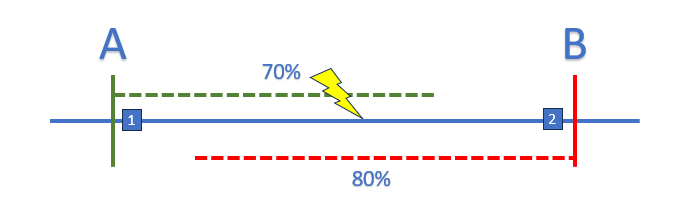






**2) Análise analítica/Programação**

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
import math

In [137]:
#parametros
RTCa = 2000/5
RTPa = 500e3/115
RTCb = 3000/1
RTPb = 525e3/100
zprim = 5 + 65j
zonaA = 0.7
zonaB = 0.8


#cálculo da impedância secundária de A
zsecA = cmath.polar(zprim*zonaA*(RTCa/RTPa))
print("ZsecA = ", zsecA)

#cálculo da impedância secundária de B
zsecB = cmath.polar(zprim*zonaB*(RTCb/RTPb))
print("ZsecB= ", zsecB)

ZsecA =  (4.198366348950506, 1.4940244355251187)
ZsecB=  (29.80206813806925, 1.4940244355251187)


Primeiro evento
c =  24.49894971583469
beta =  158.7858496922944 graus
alfa = 180 - beta =  21.21415030770561 graus
Está dentro da zona de atuação de A.
---------------------------------------------------
c = 25.446024442048913
beta =  160.74723251578732 graus
alfa = 180 - beta =  19.252767484212683 graus
Está dentro da zona de atuação de B.


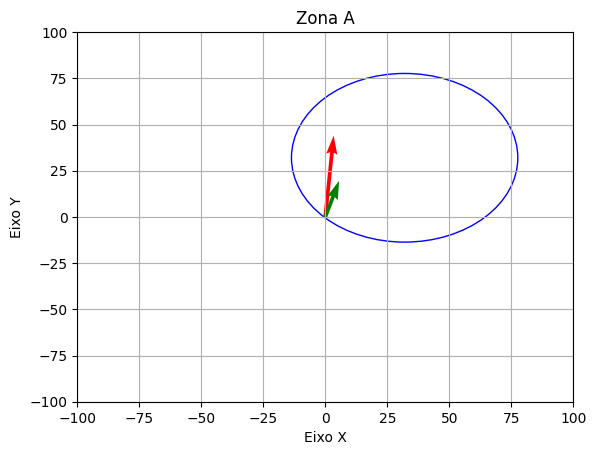

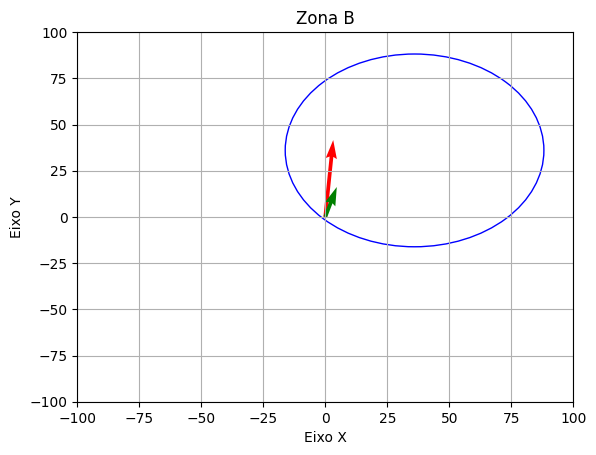

In [138]:
#método de comparação de fases de A
def metodo_faseA(Ifa, Vfa, tetaVfa):
  #primeira lei dos cossenos para achar c
  c = (float((zsecA[0])*(Ifa/RTCa))**2 + (Vfa/RTPa)**2 - 2*float(zsecA[0])*(Ifa/RTCa)*(Vfa/RTPa)*math.cos(float(zsecA[1]) - tetaVfa*math.pi/180))**0.5
  print('c = ',c)
  #segunda lei dos cossenos para achar beta
  beta = math.acos(((Vfa/RTPa)**2 + c**2 - float((zsecA[0])*(Ifa/RTCa))**2)/(2*(Vfa/RTPa)*c))
  print("beta = ", beta*180/math.pi, "graus")
  alfa = 180 - (beta*180/math.pi)
  print("alfa = 180 - beta = ", alfa, "graus")

  #condição
  if alfa < 90:
    print("Está dentro da zona de atuação de A.")
  else:
    print("Está fora da zona de atuação A.")

  #plotando o gráfico

  fig, ax = plt.subplots()

  #Parâmetros do círculo
  radius = 0.7*cmath.polar(zprim)[0]
  center = (32, 32) #evento 1

  # Desenhar o círculo
  circle = plt.Circle(center, radius, edgecolor='b', facecolor='none')
  ax.add_patch(circle)

  # Parâmetros do vetor
  vector_magnitude_ZsIf = zsecA[0]*Ifa/RTCa
  vector_angle_ZsIf = zsecA[1]  # ângulo em radianos

  vector_magnitude_Vf = Vfa/RTPa
  vector_angle_Vf = tetaVfa*math.pi/180  # ângulo em radianos

  # Calcular as coordenadas finais do vetor
  vector_x_ZsIf = vector_magnitude_ZsIf * np.cos(vector_angle_ZsIf)
  vector_y_ZsIf = vector_magnitude_ZsIf * np.sin(vector_angle_ZsIf)

  vector_x_Vf = vector_magnitude_Vf * np.cos(vector_angle_Vf)
  vector_y_Vf = vector_magnitude_Vf * np.sin(vector_angle_Vf)

  # Desenhar o vetor
  ax.quiver(0, 0, vector_x_ZsIf, vector_y_ZsIf, angles='xy', scale_units='xy', scale=1, color='r')
  ax.quiver(0, 0, vector_x_Vf, vector_y_Vf, angles='xy', scale_units='xy', scale=1, color='g')

  # Ajustar os limites dos eixos para garantir que o círculo inteiro seja visível
  ax.set_xlim([-100, 100])
  ax.set_ylim([-100, 100])



  # Adicionar rótulos
  ax.set_title('Zona A')
  ax.set_xlabel('Eixo X')
  ax.set_ylabel('Eixo Y')

  # Exibir o gráfico
  plt.grid(True)





#metodo de comparação de fase de B
def metodo_faseB(Ifb, Vfb, tetaVfb):
  #primeira lei dos cossenos para achar c
  c = (float((zsecB[0])*(Ifb/RTCb))**2 + (Vfb/RTPb)**2 - 2*float(zsecB[0])*(Ifb/RTCb)*(Vfb/RTPb)*math.cos(float(zsecB[1]) - tetaVfb*math.pi/180))**0.5
  print('c =', c)

  #segunda lei dos cossenos para achar beta
  beta = math.acos(((Vfb/RTPb)**2 + c**2 - float((zsecB[0])*(Ifb/RTCb))**2)/(2*(Vfb/RTPb)*c))
  print("beta = ", beta*180/math.pi, "graus")
  alfa = 180 - (beta*180/math.pi)
  print("alfa = 180 - beta = ", alfa, "graus")

  #condição
  if alfa < 90:
    print("Está dentro da zona de atuação de B.")
  else:
    print("Está fora da zona de atuação de B.")


  #plotando o gráfico

  fig, ax = plt.subplots()

  #Parâmetros do círculo
  radius = 0.8*cmath.polar(zprim)[0]
  center = (36, 36) #evento 1

  # Desenhar o círculo
  circle = plt.Circle(center, radius, edgecolor='b', facecolor='none')
  ax.add_patch(circle)

  # Parâmetros do vetor
  vector_magnitude_ZsIf = zsecB[0]*Ifb/RTCb
  vector_angle_ZsIf = zsecB[1]  # ângulo em radianos

  vector_magnitude_Vf = Vfb/RTPb
  vector_angle_Vf = tetaVfb*math.pi/180  # ângulo em radianos

  # Calcular as coordenadas finais do vetor
  vector_x_ZsIf = vector_magnitude_ZsIf * np.cos(vector_angle_ZsIf)
  vector_y_ZsIf = vector_magnitude_ZsIf * np.sin(vector_angle_ZsIf)

  vector_x_Vf = vector_magnitude_Vf * np.cos(vector_angle_Vf)
  vector_y_Vf = vector_magnitude_Vf * np.sin(vector_angle_Vf)

  # Desenhar o vetor
  ax.quiver(0, 0, vector_x_ZsIf, vector_y_ZsIf, angles='xy', scale_units='xy', scale=1, color='r')
  ax.quiver(0, 0, vector_x_Vf, vector_y_Vf, angles='xy', scale_units='xy', scale=1, color='g')

  # Ajustar os limites dos eixos para garantir que o círculo inteiro seja visível
  ax.set_xlim([-100, 100])
  ax.set_ylim([-100, 100])

  # Adicionar rótulos
  ax.set_title('Zona B')
  ax.set_xlabel('Eixo X')
  ax.set_ylabel('Eixo Y')

  # Exibir o gráfico
  plt.grid(True)

#primeiro evento -- ajustar o parametro center de acordo com o evento.
print('Primeiro evento')
metodo_faseA(4200, 88450, 74)
print('---------------------------------------------------')
metodo_faseB(4200, 88450, 74)

Segundo evento
c =  15.47792696373116
beta =  173.8413432707173 graus
alfa = 180 - beta =  6.158656729282711 graus
Está dentro da zona de atuação de A.
---------------------------------------------------
c = 50.509605730289195
beta =  7.196398464682163 graus
alfa = 180 - beta =  172.80360153531782 graus
Está fora da zona de atuação de B.


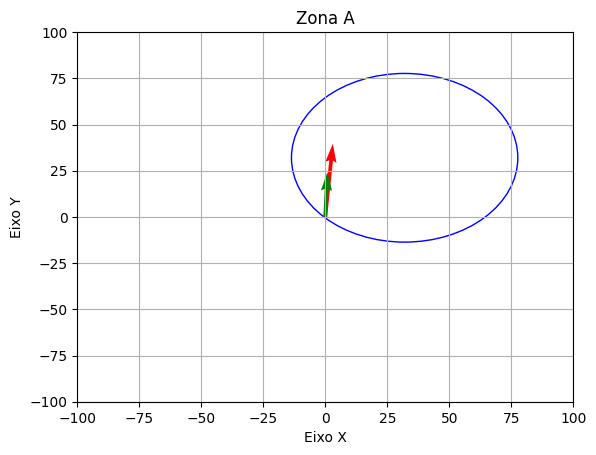

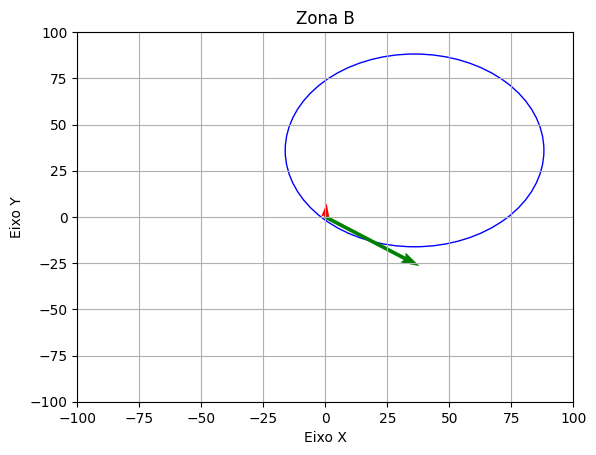

In [139]:
print('Segundo evento')
metodo_faseA(3780, 105440, 88)
print('---------------------------------------------------')
metodo_faseB(740, 243440, -35)

Terceiro evento
c =  71.98306417499631
beta =  7.275931594500653 graus
alfa = 180 - beta =  172.72406840549934 graus
Está fora da zona de atuação A.
---------------------------------------------------
c = 15.7605512726437
beta =  7.45246442147834 graus
alfa = 180 - beta =  172.54753557852166 graus
Está fora da zona de atuação de B.


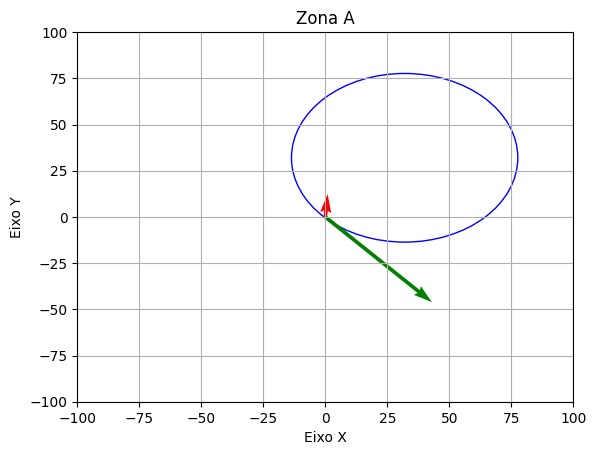

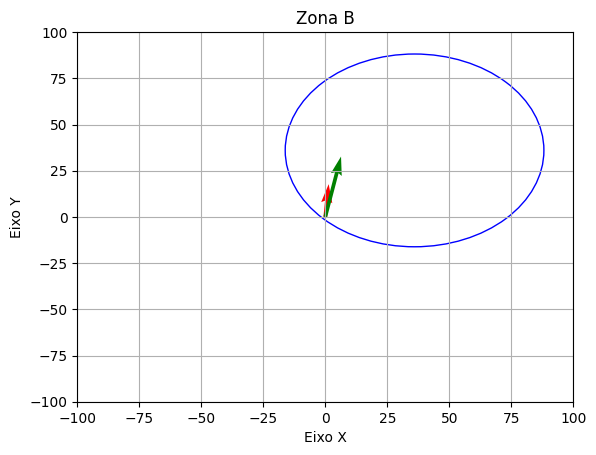

In [140]:
print('Terceiro evento')
metodo_faseA(1180, 274000, -47)
print('---------------------------------------------------')
metodo_faseB(1790, 174780, 79)